# Module 2 Optional Challenge Quesiton: A Service Product Profit Projection Model

Course: Gen Bus 730\
Author: Matthew Brown\
Date: 9/11/2025

## Business Scenario

Your boss is asking you to build a model that helps them project the total profit they'll earn for a service product over the next 6 months. The company plans to price the product at $120/unit each month, except sales will be offered in month 3 for $100/unit and in month 6 for $80/unit.

To help predict the sales in a given month, the analytics team collected some basic elasticity data to be used in the linear regression model to predict how price affects sales in a given month.

Your boss also provided some cost figures. The current best guess for the first month is a fixed cost of about $500/month and a variable cost of $60/unit each month.  The fixed cost is expected to grow at a rate of 2%/month.

## Analysis

### Install and Import Libraries

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Setup Input Parameters

In [4]:
# Setup input parameters

# Elasticity (training) data
elasticity_data = pd.DataFrame({
    'price': [70, 80, 90, 100, 110, 120, 130, 140], # price points in USD
    "units_sold": [205, 184, 147, 125, 109, 105, 75, 55] # corresponding units sold
})

# Set forecast horizon and planned pricing strategy
num_months = 6 # number of months to forecast
monthly_price = [120, 120, 100, 120, 120, 80] # planned price for each month, must match length of num_months

 # Cost Assumptions

fixed_cost = 500 # fixed cost in USD per month
fixed_cost_growth_rate = 0.02 # fixed cost growth rate per month
variable_cost = 60 # variable cost per unit in USD per month

# Quick validation of inputs
if len(monthly_price) != num_months:
    raise ValueError("Length of monthly_price must match num_months")

### Profit Calculations (Fit Regression and Predict Sales)

In [12]:
# Profit calculations using linear regression

# Train linear regression model on elasticity data
x = elasticity_data[['price']]
y = elasticity_data['units_sold']

# Create and fit the model
model = LinearRegression()
model.fit(x, y)

# Predict units for each month based on planned pricing
predicted_units = model.predict(np.array(monthly_price).reshape(-1, 1))

# Limit for negative predictions
predicted_units = np.maximum(predicted_units, 0)

# Clean the predictions
predicted = pd.Series(predicted_units, index = np.arange(1, num_months + 1), name = 'predicted_units')

# Profit results
print("Regression Intercept: ", model.intercept_)
print("Regression Coefficient (Units per $): ", model.coef_[0])
print("Predicted Units: ", predicted.round().astype("int64").tolist())

Regression Intercept:  342.75
Regression Coefficient (Units per $):  -2.067857142857143
Predicted Units:  [95, 95, 136, 95, 95, 177]


C:\Users\brown\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Expense Calculations

In [13]:
# Expense Calculations

# Set up lists to hold monthly profit and expenses
fixed_costs = []
variable_costs = []
revenues = []
profits = []

# Set fixed cost for the first month
fixed_cost = fixed_cost

# For loop to calculate monthly expenses and profits
for i in range(num_months):
    # Calculate the monthly price and units sold
    price = monthly_price[i]
    units = predicted.iloc[i]

    # Calculate profit for each month
    revenue = price * units
    var_cost = variable_cost * units
    profit = revenue - var_cost - fixed_cost

    # Append results to lists
    revenues.append(revenue)
    variable_costs.append(var_cost)
    fixed_costs.append(fixed_cost)
    profits.append(profit)

    # Grow fixed cost for next month
    fixed_cost *= (1 + fixed_cost_growth_rate)

### Model Results (Table)

In [14]:
# Model the results
results = pd.DataFrame({
    'Month': np.arange(1, num_months + 1),
    'Planned_Price': monthly_price,
    'Predicted_Units_Sold': predicted.round().astype("int64").tolist(),
    'Revenue': np.round(revenues, 2),
    'Variable_Cost': np.round(variable_costs, 2),
    'Fixed_Cost': np.round(fixed_costs, 2),
    'Profit': np.round(profits, 2)
})

results

,Month,Planned_Price,Predicted_Units_Sold,Revenue,Variable_Cost,Fixed_Cost,Profit
0,1,120,95,11352.86,5676.43,500.00,5176.43
1,2,120,95,11352.86,5676.43,510.00,5166.43
2,3,100,136,13596.43,8157.86,520.20,4918.37
3,4,120,95,11352.86,5676.43,530.60,5145.82
4,5,120,95,11352.86,5676.43,541.22,5135.21
5,6,80,177,14185.71,10639.29,552.04,2994.39


### Profit Trend (Chart)

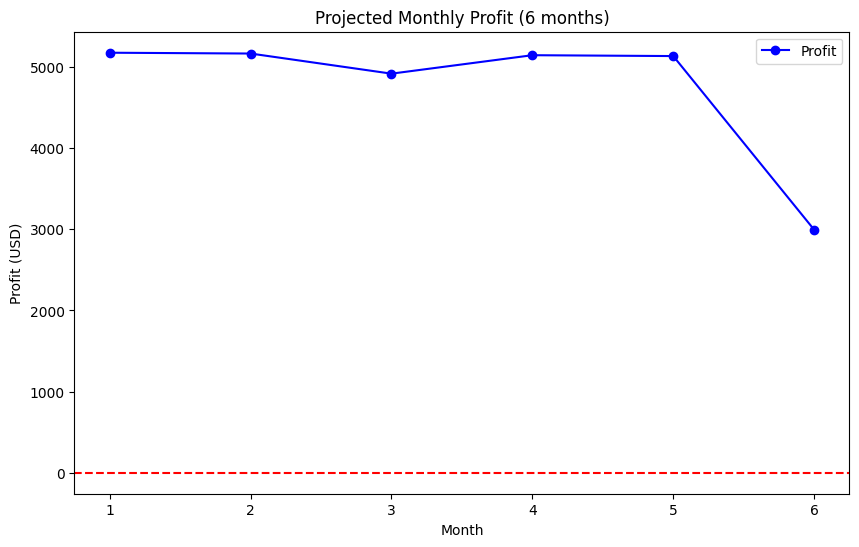

In [15]:
# Create a plot to show profit over time
plt.figure(figsize = (10, 6))
plt.plot(results['Month'], results['Profit'], marker = 'o', linestyle = '-', color = 'b', label = 'Profit')
plt.axhline(0, color = 'red', linestyle = '--')
plt.title("Projected Monthly Profit (6 months)")
plt.xlabel("Month")
plt.ylabel("Profit (USD)")
plt.legend()
plt.show()